In [2]:
import os
import sys




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Define the folder path inside Google Drive
drive_folder = "/content/drive/My Drive/scripts"

# Append it to sys.path to allow importing modules
sys.path.append(os.path.abspath(drive_folder))

In [6]:
from ARIMA import ARIMAModel

modelling = ARIMAModel()


In [9]:

import pandas as pd
stoke_data=pd.read_csv("stock_data.csv")
stoke_data.set_index("Date",inplace=True)

In [10]:
stoke_data.head()

,TSLA,BND,SPY
Date,,,
2015-01-02,14.620667,62.573124,172.592911
2015-01-05,14.006000,62.754799,169.475952
2015-01-06,14.085333,62.936520,167.879669
2015-01-07,14.063333,62.974339,169.971558
2015-01-08,14.041333,62.875961,172.987778


# check for stationarity

In [11]:
modelling.assess_stationarity(stoke_data, 'TSLA')

ADF Test Statistic: -1.1507672706146086
p-Value: 0.6944080657685285
Lag Used: 27
Observations Used: 2446
Critical Values: {'1%': -3.433026277967909, '5%': -2.862722353917318, '10%': -2.56739941472018}
Stationarity Conclusion: Non-Stationary


# Data splitting

In [13]:
train_data, test_data = modelling.split_dataset(stoke_data, 'TSLA')

In [14]:
best_params=modelling.optimize_arima_order(train_data)

Optimal ARIMA parameters found: (2, 1, 3)


# train the model with ARIMA

In [15]:
model = modelling.fit_arima_model(train_data, test_data, best_params, 'TSLA')

# evaluation

In [16]:
modelling.evaluate_model_performance(test_data, model)

Evaluation Metrics:
MAE: 38.679237042432206
MSE: 2386.409614096125
RMSE: 48.85089164074823
R2 Score: -0.6007220025944171
MAPE: 17.526002500197674%


# visualization

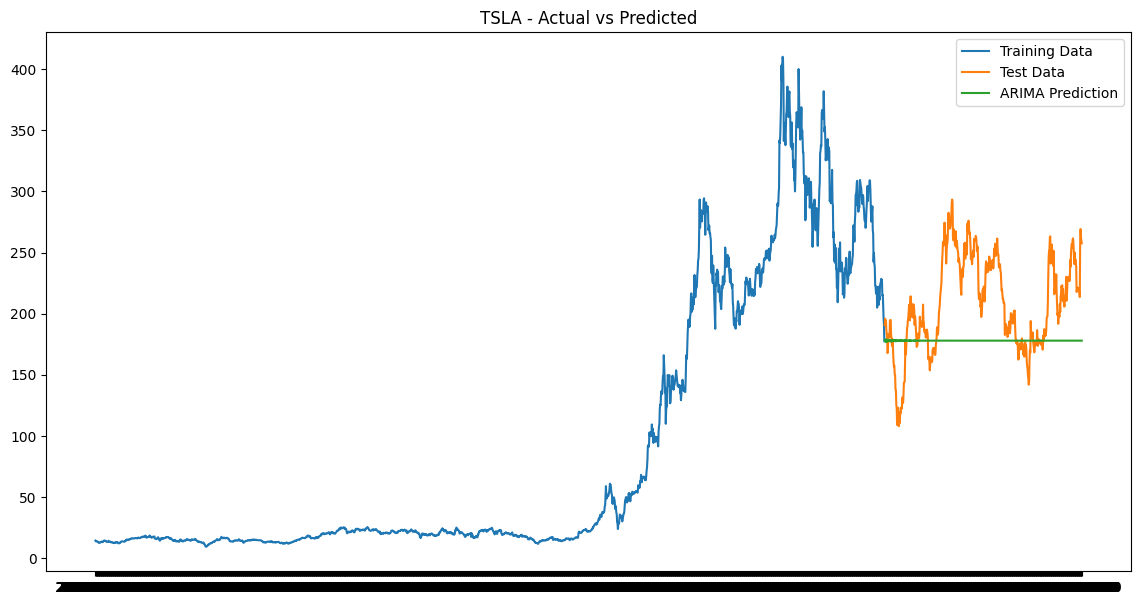

In [17]:
modelling.display_forecast_results('TSLA', train_data, test_data, model)

In [18]:
modelling.assess_stationarity(stoke_data, 'BND')

ADF Test Statistic: -1.4626073275744027
p-Value: 0.5519212613855996
Lag Used: 24
Observations Used: 2449
Critical Values: {'1%': -3.4330229961087557, '5%': -2.8627209046733073, '10%': -2.5673986431191405}
Stationarity Conclusion: Non-Stationary


In [21]:
bnd_train_data, bnd_test_data = modelling.split_dataset(stoke_data, 'BND')

In [22]:
bnd_best_params=modelling.optimize_arima_order(bnd_train_data)

Optimal ARIMA parameters found: (4, 1, 4)


In [23]:
model_bnd = modelling.fit_arima_model(bnd_train_data, bnd_test_data, bnd_best_params, 'BND')

In [24]:
modelling.evaluate_model_performance(bnd_test_data, model_bnd)

Evaluation Metrics:
MAE: 4.374332828077404
MSE: 23.29791257265971
RMSE: 4.8267911258578104
R2 Score: -4.5928073925646045
MAPE: 6.2346587380617375%


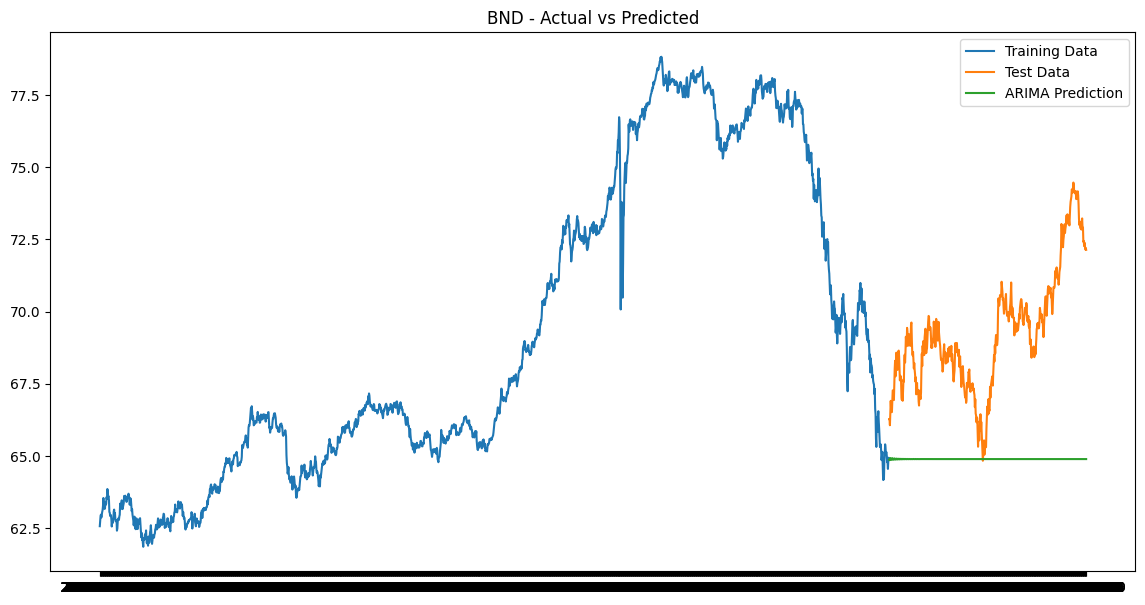

In [25]:
modelling.display_forecast_results('BND', bnd_train_data, bnd_test_data, model_bnd)

In [26]:
modelling.assess_stationarity(stoke_data, 'SPY')

ADF Test Statistic: 1.0133126276886322
p-Value: 0.9944044450717108
Lag Used: 27
Observations Used: 2446
Critical Values: {'1%': -3.433026277967909, '5%': -2.862722353917318, '10%': -2.56739941472018}
Stationarity Conclusion: Non-Stationary


In [27]:
SPY_train_data, SPY_test_data = modelling.split_dataset(stoke_data, 'SPY')
SPY_best_params=modelling.optimize_arima_order(SPY_train_data)

Optimal ARIMA parameters found: (4, 1, 4)


In [28]:
model_SPY = modelling.fit_arima_model(SPY_train_data, SPY_test_data, SPY_best_params, 'SPY')

In [29]:
modelling.evaluate_model_performance(SPY_test_data, model_SPY)

Evaluation Metrics:
MAE: 99.22870976097826
MSE: 13731.743215751421
RMSE: 117.18252094809797
R2 Score: -2.5344338196612997
MAPE: 20.08997546166886%


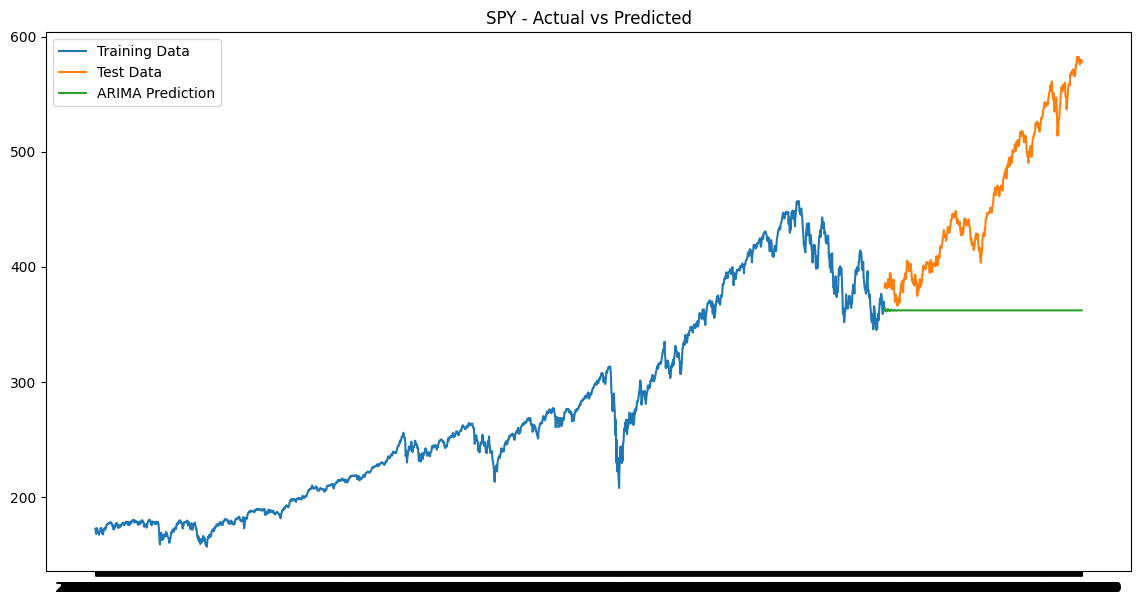

In [30]:
modelling.display_forecast_results('SPY', SPY_train_data, SPY_test_data, model_SPY)